In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("bestsellers with categories.csv")

In [4]:
df.head(5)


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
df.shape

(550, 7)

In [6]:
# Про скільки книг зберігає дані датасет? Відповідь: 550

In [10]:
df = df.rename(str.lower, axis='columns')
df.head()

,name,author,user rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


## Первинне дослідження даних

In [11]:
df.isna().sum()

name           0
author         0
user rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [12]:
# Чи є в якихось змінних пропуски? Відповідь:  ні

In [14]:
pd.unique(df["genre"])

array(['Non Fiction', 'Fiction'], dtype=object)

In [15]:
#  Які є унікальні жанри? Відповідь: 'Non Fiction', 'Fiction'

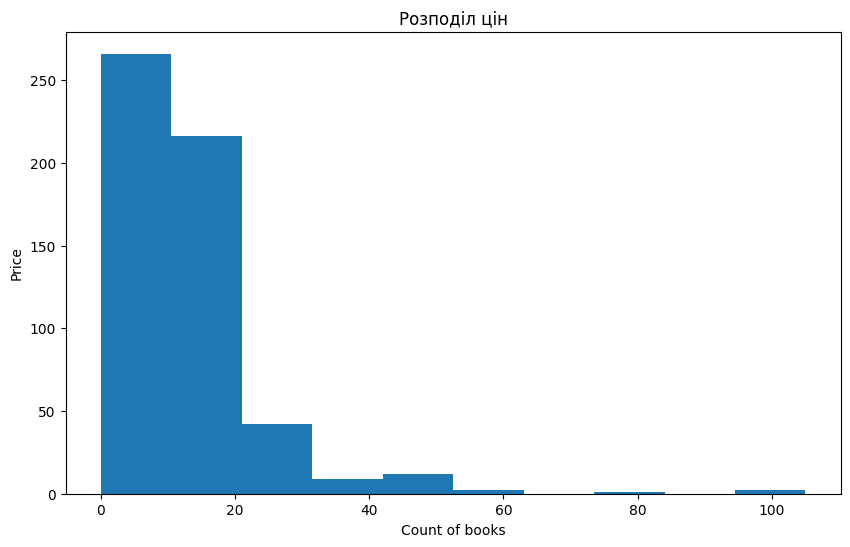

In [20]:
plt.figure(figsize = (10, 6))

ax = df["price"].plot(kind = 'hist', title = "Pозподіл цін")

ax.set_xlabel('Count of books')
ax.set_ylabel('Price')

plt.show()

In [22]:
# Cередня ціна? Відповідь: 13.1
df['price'].mean()

13.1

In [23]:
# Максимальна ціна? Відповідь: 105
df['price'].max()

105

In [24]:
# Мінімальна ціна? Відповідь: 0
df['price'].min()

0

In [25]:
# Медіанна ціна? Відповідь: 11.0
df['price'].median()

11.0

## Пошук та сортування даних


In [27]:
#  Який рейтинг у датасеті найвищий? Відповідь: 4.9
df["user rating"].max()

4.9

In [56]:
# Скільки книг мають такий рейтинг? Відповідь: 52
df.query('`user rating` == 4.9').shape[0]


52

In [50]:
# Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing
df["reviews"].max() # 87841
df[(df.reviews == df["reviews"].max())]["name"]

534    Where the Crawdads Sing
Name: name, dtype: object

In [48]:
# З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? 
# Відповідь :Publication Manual of the American Psychologic...
max_price_for_2015 = df.query("year == 2015")["price"].max() # 46
df[(df.year == 2015) & (df.price == max_price_for_2015)]["name"]

277    Publication Manual of the American Psychologic...
Name: name, dtype: object

In [57]:
# Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20
df[(df.year == 2010) & (df.genre == "Fiction")].shape[0]

20

In [58]:
# Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1
df[((df["year"] == 2010) | (df["year"] == 2011)) & (df["user rating"] == 4.9)].shape[0]

1

In [60]:
# І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році
# і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
df[(df.year == 2015) & (df.price < 8)].sort_values(by="price")

,name,author,user rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


In [61]:
#  Яка книга остання у відсортованому списку? Відповідь:  Old School (Diary of a Wimpy Kid #10)

## Агрегування даних та з'єднання таблиць

In [90]:
pd.DataFrame(df.groupby("genre").agg(max_price=('price', max), min_price=('price', 'min')))

,max_price,min_price
genre,,
Fiction,82,0
Non Fiction,105,0


In [70]:
# Максимальна ціна для жанру Fiction: 105
# Мінімальна ціна для жанру Fiction: 0
# Максимальна ціна для жанру Non Fiction: 82
# Мінімальна ціна для жанру Non Fiction: 0

In [81]:
author_book_count = pd.DataFrame(df.groupby("author")["name"].count())
author_book_count

,name
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


In [82]:
# Якої розмірності вийшла таблиця? Відповідь: 248x1(2)

In [89]:
# Який автор має найбільше книг? Відповідь: Jeff Kinney
# Скільки книг цього автора? Відповідь: 12
author_book_count[(author_book_count.name == author_book_count["name"].max())]

,name
author,
Jeff Kinney,12


In [95]:
# А як змінити назву колонки, яку ми агрегуємо?
avg_author_rating = pd.DataFrame(df.groupby("author")['user rating'].mean())
avg_author_rating.head()

,user rating
author,
Abraham Verghese,4.6
Adam Gasiewski,4.4
Adam Mansbach,4.8
Adir Levy,4.8
Admiral William H. McRaven,4.7


In [99]:
# У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt
# Який у цього автора середній рейтинг? Відповідь: 3.9
avg_author_rating[(avg_author_rating["user rating"] == avg_author_rating["user rating"].min())]

,user rating
author,
Donna Tartt,3.9


In [110]:
concated_df = pd.concat([author_book_count, avg_author_rating], axis=1)
concated_df.sort_values(by=["name", "user rating"])

,name,user rating
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


In [ ]:
# Який автор перший у списку? Відповідь: Muriel Barbery

## Візуалізація

In [113]:
sns.set_style('darkgrid')

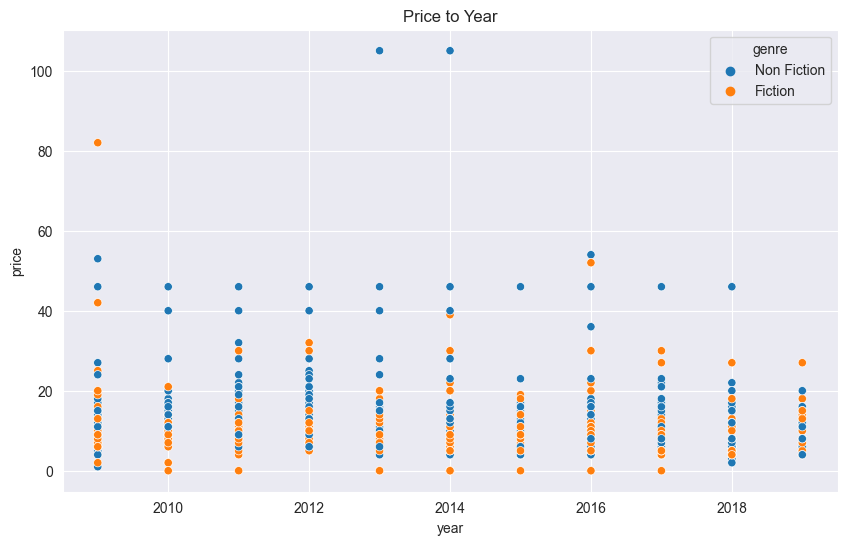

In [115]:
plt.figure(figsize = (10,6))
ax = sns.scatterplot(x = 'year',
                y = 'price',
                hue = 'genre',
                data = df)

ax.set_title("Price to Year")
plt.show()

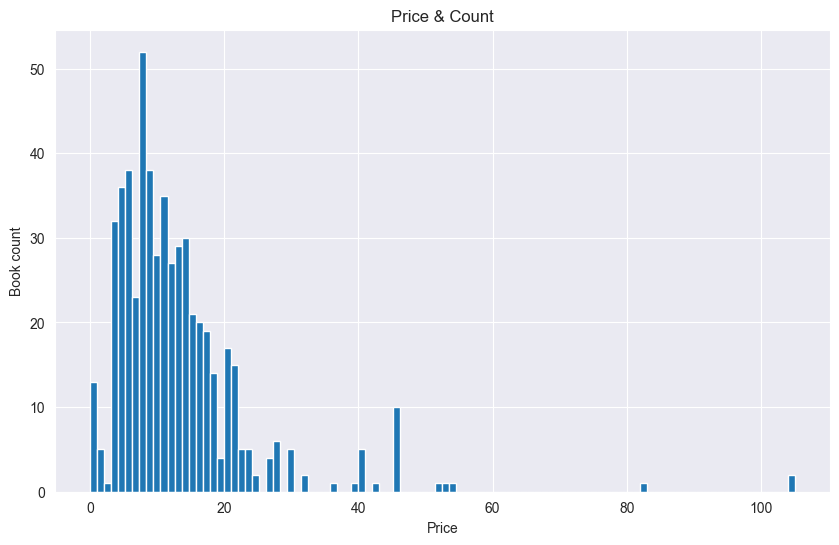

In [121]:
plt.figure(figsize = (10,6))

ax = df["price"].plot(kind = 'hist',
                      bins = 100, 
                      title = "Price & Count")

ax.set_xlabel('Price')
ax.set_ylabel('Book count')

plt.show()

<Axes: xlabel='year', ylabel='price'>

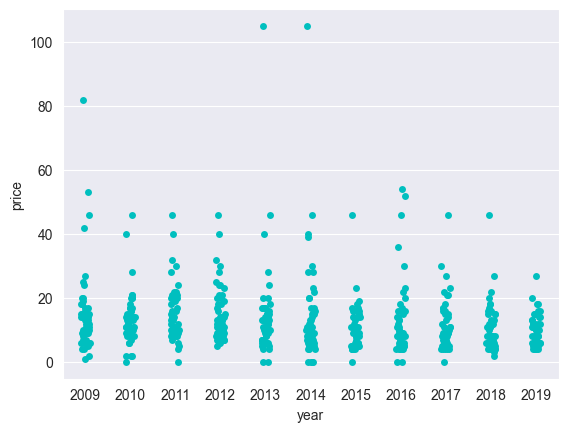

In [127]:
sns.stripplot(x='year', y='price', color="c", data=df)